# DO THE THING

In [ ]:
## IF SIC_freerun < 15%
## we consider SIC = 0 && SIT = 0

## >> should remove all the same bias in SIT that could perturb the correction by ML

In [1]:
import os
import sys
import yaml
import numpy as np
import xarray as xr
import pandas as pd
import pickle as pkl
from glob import glob
from datetime import datetime
from datetime import timedelta

from src.data_preparation import load_data
from src.feature_extraction import extract_pca
from src.utils import load_config
from src.utils import tardisml_utils

rootdir = tardisml_utils.get_rootdir()

## Visual differences

In [2]:
pca_dir = 'Leo/results/pca_i100-550_j150-629/'

In [3]:
years = [2011,2022]

In [9]:
print('Loading SIT TOPAZ datasets...')

target_field = 'sithick'
suffix = '_FreeRun'  # without assimilation
filename = os.path.join(rootdir, pca_dir, f"{target_field}_TOPAZ4b23_{years[0]}_{years[-1]}{suffix}.nc")
sit_na, chrono_na = load_data.load_nc(filename, f'{target_field}', True)

# with assimilation
filename = os.path.join(rootdir, pca_dir, f"{target_field}_TOPAZ4b23_{years[0]}_{years[-1]}.nc")
sit_a, chrono_a = load_data.load_nc(filename, f'{target_field}', True)


Loading SIT TOPAZ datasets...


In [10]:
print('Loading SIT TOPAZ datasets...')
filename = os.path.join(rootdir, pca_dir, f"sithick_TOPAZ4b23_1999_2010_FreeRun.nc")
sit_na, chrono_na = load_data.load_nc(filename, f'{target_field}', True)



Loading SIT TOPAZ datasets...


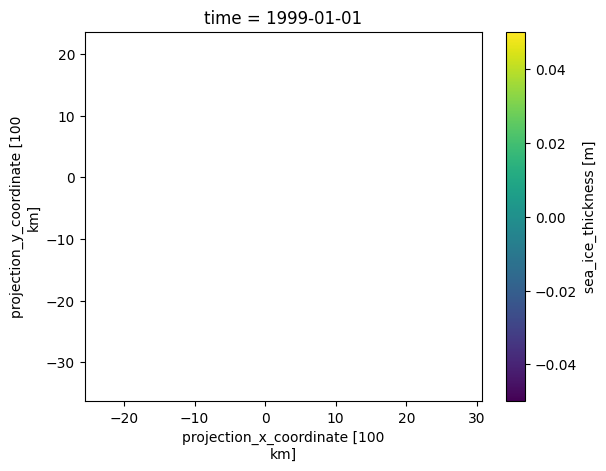

In [23]:
sit_na.isel(time=0).plot()

In [5]:
print('Loading SIC TOPAZ datasets...')

target_field = 'siconc'
suffix = '_FreeRun'  # without assimilation
filename = os.path.join(rootdir, pca_dir, f"{target_field}_TOPAZ4b23_{years[0]}_{years[-1]}{suffix}.nc")
sic_na, chrono_na = load_data.load_nc(filename, f'{target_field}', True)

# with assimilation
filename = os.path.join(rootdir, pca_dir, f"{target_field}_TOPAZ4b23_{years[0]}_{years[-1]}.nc")
sic_a, chrono_a = load_data.load_nc(filename, f'{target_field}', True)


Loading SIC TOPAZ datasets...


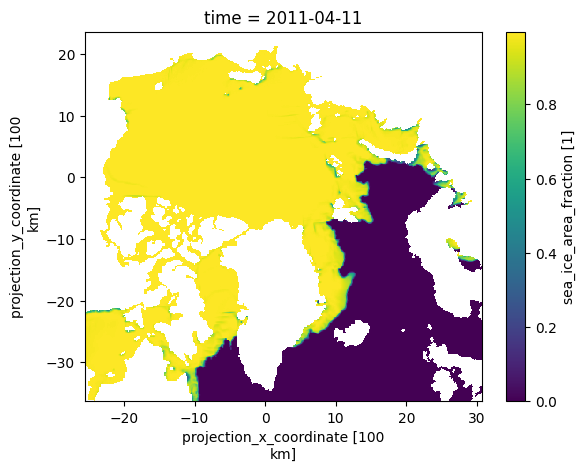

In [8]:
sic_na.isel(time=100).plot()

In [12]:
sit_a

<xarray.DataArray 'sithick' (time: 4383, y: 479, x: 450)>
[944755650 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2022-12-31
    latitude   (y, x) float32 ...
    longitude  (y, x) float32 ...
  * x          (x) float32 -25.5 -25.38 -25.25 -25.12 ... 30.25 30.38 30.5 30.62
  * y          (y) float32 -36.25 -36.12 -36.0 -35.88 ... 23.12 23.25 23.38 23.5
Attributes:
    cell_methods:   area: mean where sea_ice
    grid_mapping:   stereographic
    standard_name:  sea_ice_thickness
    units:          m

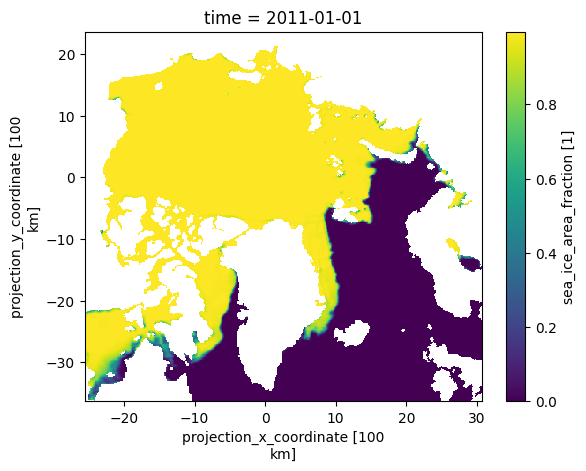

In [16]:
sic_a.isel(time=0).plot()

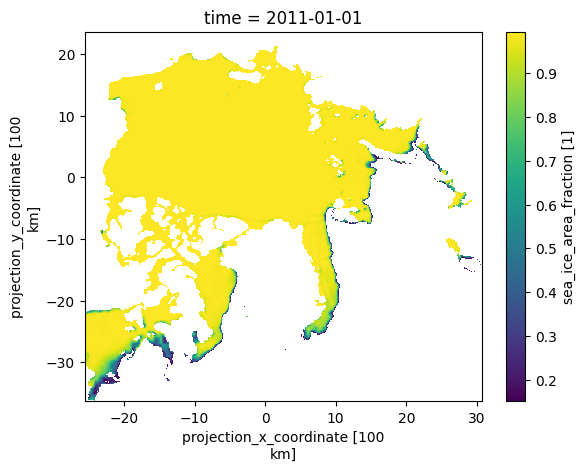

In [19]:
sic_a.isel(time=0).where(sic_a.isel(time=0)>0.15).plot()

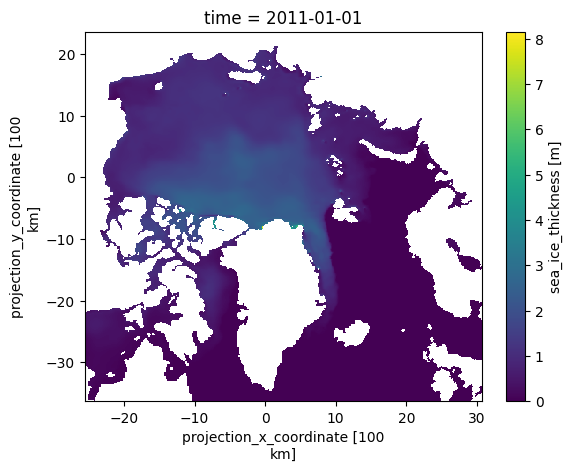

In [21]:
sit_a.isel(time=0).plot()

In [25]:
sit_a_adj = sit_a.isel(time=0).where(sic_a.isel(time=0)>0.15)
sit_na_adj = sit_na.isel(time=0).where(sic_a.isel(time=0)>0.15)

In [53]:
sit_a_adj = sit_a.isel(time=0).where((sic_a.isel(time=0)>0.15) | (sic_a.isel(time=0).isnull()), 0)
sit_na_adj = sit_na.isel(time=0).where((sic_a.isel(time=0)>0.15) | (sic_a.isel(time=0).isnull()), 0)

In [31]:
sit_a.isel(time=0).where(sic_a.isel(time=0)>0).mean().data

array(1.0744442, dtype=float32)

In [54]:
sit_a_adj.mean()

<xarray.DataArray 'sithick' ()>
array(0.6877005, dtype=float32)
Coordinates:
    time     datetime64[ns] 2011-01-01

In [33]:
sit_na.isel(time=0).where(sic_a.isel(time=0)>0).mean().data

array(0.8854059, dtype=float32)

In [55]:
sit_na_adj.mean()

<xarray.DataArray 'sithick' ()>
array(0.5645836, dtype=float32)
Coordinates:
    time     datetime64[ns] 2011-01-01

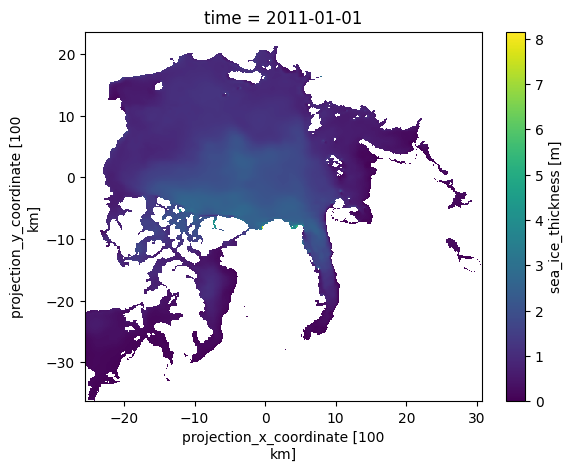

In [22]:
sit_a.isel(time=0).where(sic_a.isel(time=0)>0.15).plot(vmin=0)

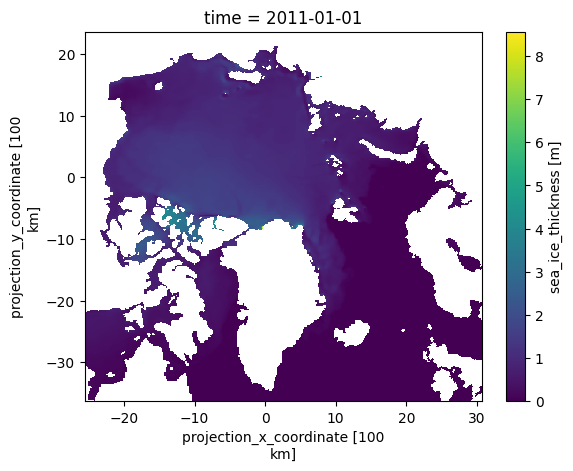

In [24]:
sit_na.isel(time=0).plot(vmin=0)

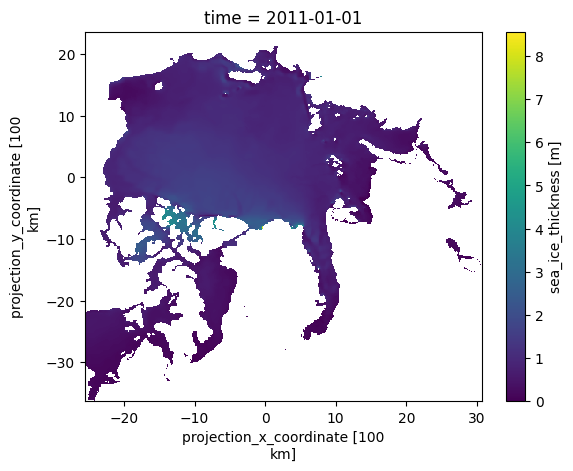

In [23]:
sit_na.isel(time=0).where(sic_a.isel(time=0)>0.15).plot(vmin=0)

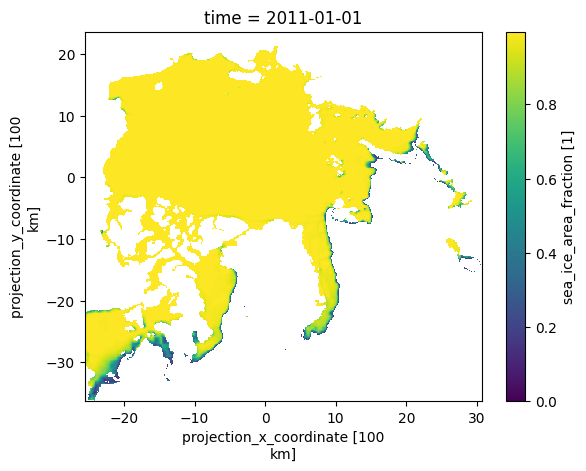

In [35]:
sic_a.isel(time=0).where(sic_a.isel(time=0)>0.15).plot(vmin=0)

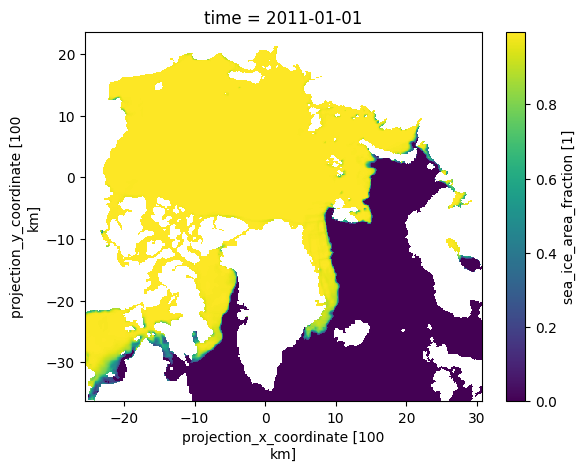

In [51]:
sic_a.isel(time=0).where((sic_a.isel(time=0)>0.15) | (sic_a.isel(time=0).isnull()), 0).plot(vmin=0)

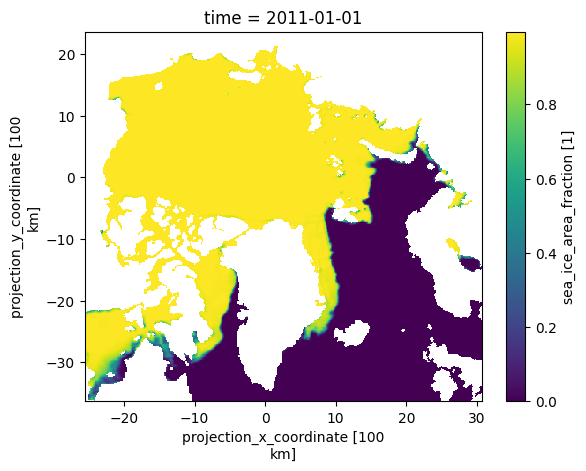

In [52]:
sic_a.isel(time=0).where((sic_a.isel(time=0)>0) | (sic_a.isel(time=0).isnull()), 0).plot(vmin=0)

In [60]:
sic_a.isel(time=0).max()

<xarray.DataArray 'siconc' ()>
array(0.995, dtype=float32)
Coordinates:
    time     datetime64[ns] 2011-01-01